<a href="https://colab.research.google.com/github/fdeiab/image-repo/blob/main/Loan_Default_Predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background

Loan approval is a critical decision for any lending institution. One of two scenarios may happen, the bank loses out on potential income by rejecting a loan to an individual or a company. Or, they lend a loan to a party exhibiting risky behaviour where heavy losses. This uncertainty is why it is a good idea that banks utilize good loan default prediction models as they stand much to gain. 

**The major goal of this notebook is to assess if a loan should be approved and predict whether a loan will default.**

# The Data

The [dataset](https://www.kaggle.com/datasets/larsen0966/sba-loans-case-data-set) used in this project, "SBA Case", is a subset of the "National SBA" data, which contains historical data from 1987 through 2014. The subset dataset focuses solely on the state of California through the years of 1989 to 2012. The dataset used contains **2,102** records under **35** attributes:

| **Variable Name**   | **Description of Variable**                            |
|:-------------------:|:------------------------------------------------------:|
|  LoanNr\_ChkDgt     |  Identifier – Primary key                              |
|  Name               |  Borrower name                                         |
|  City               |  Borrower city                                         |
|  State              |  Borrower state                                        |
|  Zip                |  Borrower zip code                                     |
|  Bank               |  Bank name                                             |
|  BankState          |  Bank state                                            |
|  NAICS              |  North American industry classification system code    |
|  ApprovalDate       |  Date SBA commitment issued                            |
|  ApprovalFY         |  Fiscal year of commitment                             |
|  Term               |  Loan term in months                                   |
|  NoEmp              |  Number of business employees                          |
|  NewExist           |  1 = Existing business, 2 = New business               |
|  CreateJob          |  Number of jobs created                                |
|  RetainedJob        |  Number of jobs retained                               |
|  FranchiseCode      |  Franchise code, \(00000 or 00001\) = No franchise     |
|  UrbanRural         |  1 = Urban, 2 = rural, 0 = undefined                   |
|  RevLineCr          |  Revolving line of credit: Y = Yes, N = No             |
|  LowDoc             |  LowDoc Loan Program: Y = Yes, N = No                  |
|  ChgOffDate         |  The date when a loan is declared to be in default     |
|  DisbursementDate   |  Disbursement date                                     |
|  DisbursementGross  |  Amount disbursed                                      |
|  BalanceGross       |  Gross amount outstanding                              |
|  MIS\_Status        |  Loan status charged off = CHGOFF, Paid in full = PIF  |
|  ChgOffPrinGr       |  Charged\-off amount                                   |
|  GrAppv             |  Gross amount of loan approved by bank                 |
|  SBA\_Appv          |  SBA's guaranteed amount of approved loan              |
|  New         |  =1 if NewExist=2 \(New Business\), =0 if NewExist=1 \(Existing Business\)                                                                  |
|  Portion     |  Proportion of gross amount guaranteed by SBA                                                                                               |
|  RealEstate  |  =1 if loan is backed by real estate, =0 otherwise                                                                                          |
|  Recession   |  =1 if loan is active during Great Recession, =0 otherwise                                                                                  |
|  Selected    |  =1 if the data are selected as training data to build model for assignment, =0 if the data are selected as testing data to validate model  |
|  Default     |  =1 if MIS\_Status=CHGOFF, =0 if MIS\_Status=PIF                                                                                            |
|  daysterm    |  Extra variable generated when creating “Recession” in Section 4\.1\.6                                                                      |
|  xx          |  Extra variable generated when creating “Recession” in Section 4\.1\.6                                                                      |


Logistic Regression will be used for this project to predict odds ratios and probabilities of a loan defaulting or not.

Target value for this project: **MIS\_Status** / **Default**

In [1]:
#@title #Importing Libraries & Loading The Dataset 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
df = pd.read_csv('/content/drive/MyDrive/SBAcase.11.13.17.csv')



# Step 1: Exploratory Data Analysis

First, we'll examine the number of null values present, the column data types, and the summary statistics to tell us more about the dataset.


In [2]:
df.info()
# to show all 35 columns 
pd.set_option('display.max_columns', None)
df.describe()
df.isnull().sum()* 100 / len(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102 entries, 0 to 2101
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Selected           2102 non-null   int64  
 1   LoanNr_ChkDgt      2102 non-null   int64  
 2   Name               2102 non-null   object 
 3   City               2102 non-null   object 
 4   State              2102 non-null   object 
 5   Zip                2102 non-null   int64  
 6   Bank               2099 non-null   object 
 7   BankState          2099 non-null   object 
 8   NAICS              2102 non-null   int64  
 9   ApprovalDate       2102 non-null   int64  
 10  ApprovalFY         2102 non-null   int64  
 11  Term               2102 non-null   int64  
 12  NoEmp              2102 non-null   int64  
 13  NewExist           2101 non-null   float64
 14  CreateJob          2102 non-null   int64  
 15  RetainedJob        2102 non-null   int64  
 16  FranchiseCode      2102 

Selected              0.000000
LoanNr_ChkDgt         0.000000
Name                  0.000000
City                  0.000000
State                 0.000000
Zip                   0.000000
Bank                  0.142721
BankState             0.142721
NAICS                 0.000000
ApprovalDate          0.000000
ApprovalFY            0.000000
Term                  0.000000
NoEmp                 0.000000
NewExist              0.047574
CreateJob             0.000000
RetainedJob           0.000000
FranchiseCode         0.000000
UrbanRural            0.000000
RevLineCr             0.095147
LowDoc                0.142721
ChgOffDate           66.841104
DisbursementDate      0.142721
DisbursementGross     0.000000
BalanceGross          0.000000
MIS_Status            0.000000
ChgOffPrinGr          0.000000
GrAppv                0.000000
SBA_Appv              0.000000
New                   0.000000
RealEstate            0.000000
Portion               0.000000
Recession             0.000000
daysterm

## Handle Missing Data


In [3]:
#@markdown The ChgOffDate Column (date a loan is entered into default) is comprised of approximately 67% of missing values, which may appear concerning at first, but if we take a look at the percentage of loans that are paid in full, it agrees with the number of null values.
#@markdown 
#@markdown Therefore, the missing values will not be filled in or removed to display the true nature of defaulted and paid-off loans. However, we will take this decision into consideration when making conclusions that may be sensitive to the null values.
df['Default'].value_counts()[0]* 100 / len(df)

67.36441484300666

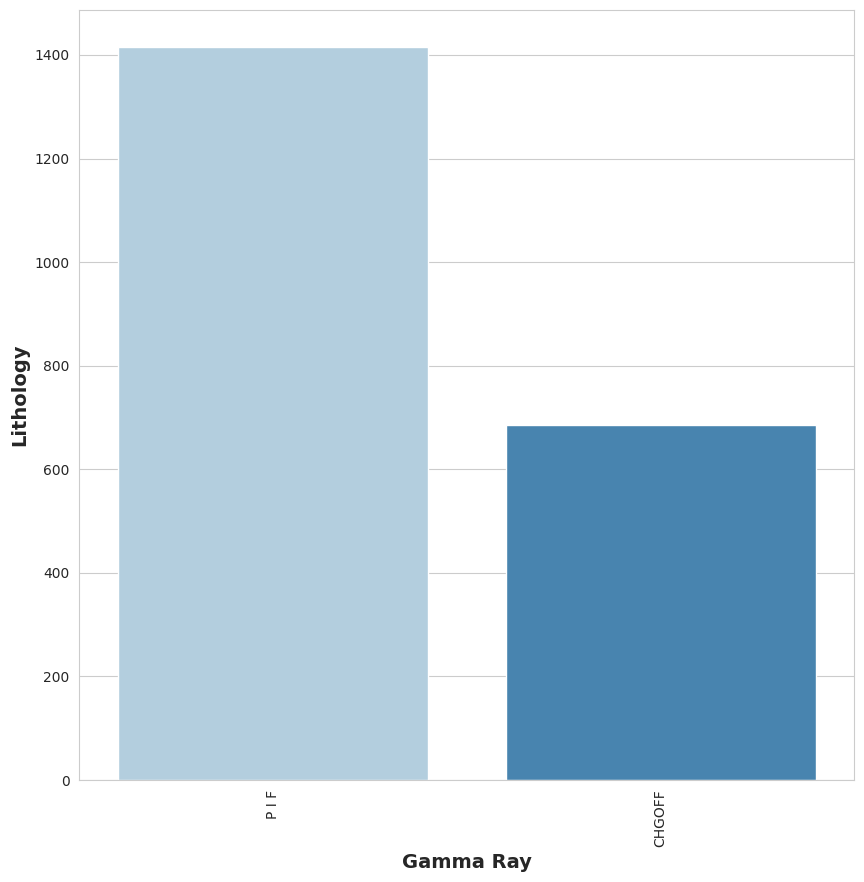

In [4]:
fig, ax = plt.subplots(1, figsize=(10, 10))
p = sns.countplot(x='MIS_Status', data=df, palette='Blues')
p.set_xlabel('Gamma Ray', fontsize= 14, fontweight='bold')
p.set_ylabel('Lithology', fontsize= 14, fontweight='bold')
plt.xticks(rotation = 90)
plt.show()